# Feature_Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
train = pd.read_csv('./datasets/clean_train.csv')

In [3]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,HouseAge
0,0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,...,0,0,0,0,0,3,2010,WD,130500,34
1,1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,...,0,0,0,0,0,4,2009,WD,220000,13
2,2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,...,0,0,0,0,0,1,2010,WD,109000,57
3,3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,...,0,0,0,0,0,4,2010,WD,174000,4
4,4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,...,0,0,0,0,0,3,2010,WD,138500,110


In [4]:
train.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
# create functions to inlcude all the feature, then plot with price in order to check the corr
# categorical features
def FP_plot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3))
    fig,ax=plt.subplots(nrows=nrows, ncols=3, figsize=(12, 5*nrows))
    ax=ax.ravel()
    # 
    for i, column in enumerate(list_of_columns):
        names = train.groupby(column).mean()['SalePrice'].sort_values().index
        sns.boxplot(dataframe[column], dataframe['SalePrice'], order = names, ax = ax[i])
        ax[i].set_title(f' SalePrice vs {column}', fontsize = 18)
        ax[i].set_ylabel('price', fontsize=15)
        ax[i].set_xlabel(column, fontsize=15)
        ax[i].set_xticklabels(names,rotation=20)

In [6]:
train.select_dtypes(include = 'object').columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

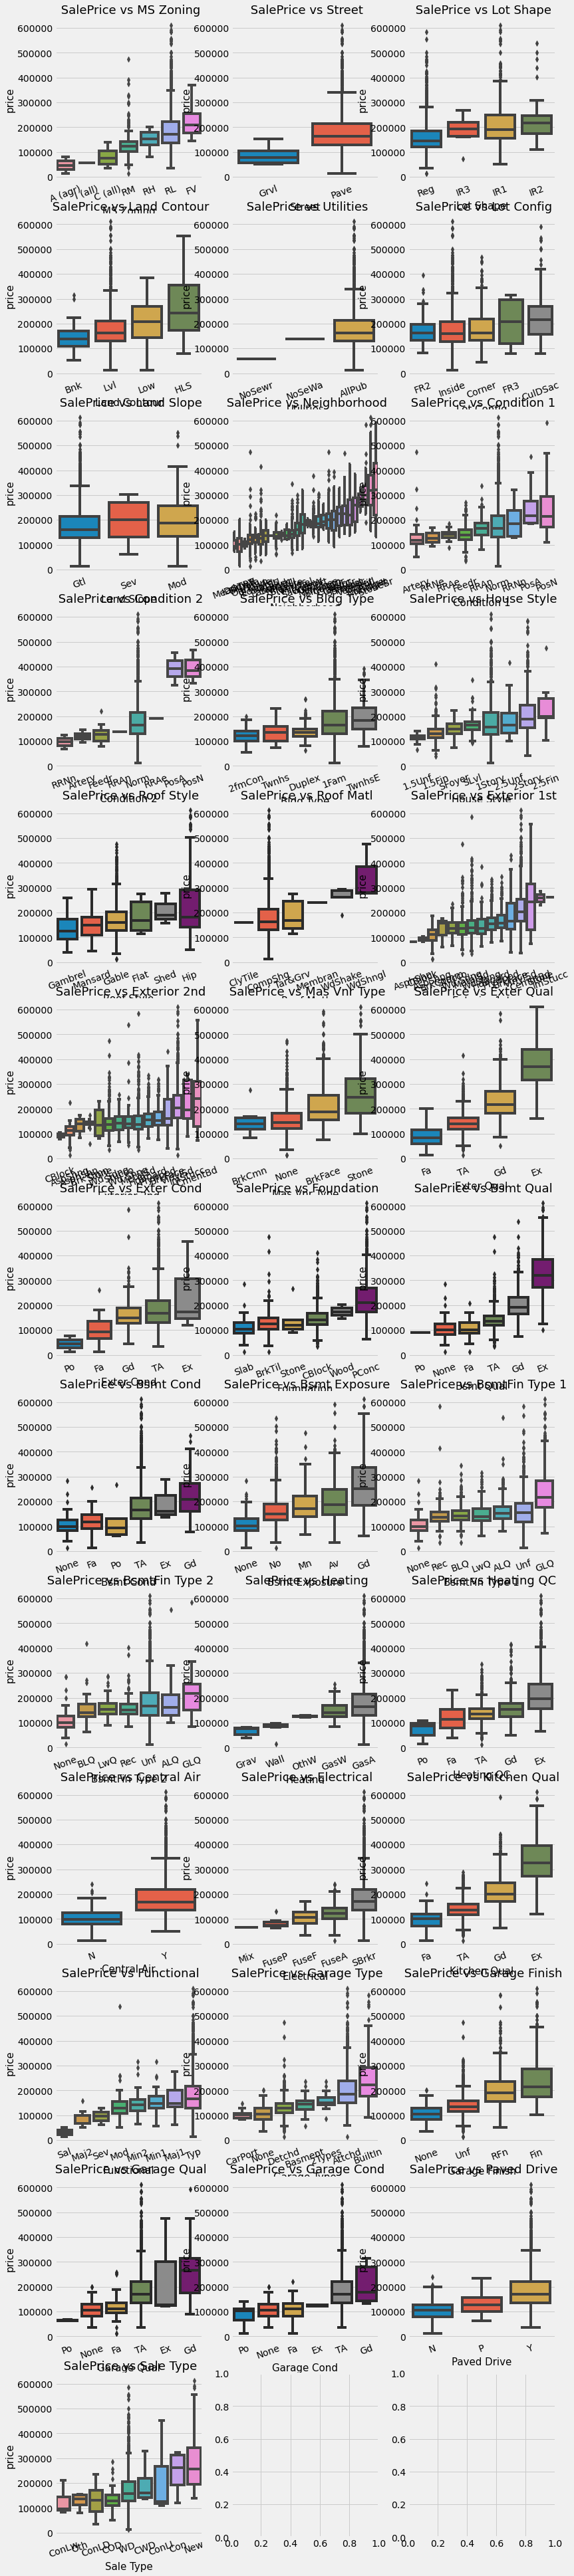

In [7]:
Categories_columns = train.select_dtypes(include = 'object').columns
FP_plot(train, Categories_columns)

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova(dataframe,list_of_columns):
    result =[]
    for i, col in enumerate(list_of_columns):
        mod = ols("dataframe['SalePrice'] ~ dataframe[col]",
                 data=dataframe).fit()
        aov_table = sm.stats.anova_lm(mod, typ=2)
        result.append(aov_table['PR(>F)'][0])
    return result

In [9]:
# anova analysis on variables for further selection
p = list(np.around(np.array(anova(train, Categories_columns)),4)) 
v = Categories_columns
a=list(zip(v,p))
list(filter(lambda x: x[1] >0.5, a))

[]

In [10]:
# remove utilities and land slope columns
train.drop(['Utilities','Land Slope'], axis=1, inplace= True)

In [11]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage

In [12]:
# numeric features
abs(train.corr()['SalePrice']).sort_values()

Misc Val           0.007375
Yr Sold            0.015203
BsmtFin SF 2       0.016432
Pool Area          0.023106
Mo Sold            0.032735
Low Qual Fin SF    0.041594
Bsmt Half Bath     0.045290
3Ssn Porch         0.048732
Id                 0.051398
MS SubClass        0.087335
Overall Cond       0.097019
Kitchen AbvGr      0.125444
Screen Porch       0.134581
Enclosed Porch     0.135656
Bedroom AbvGr      0.137067
Bsmt Unf SF        0.190861
2nd Flr SF         0.248452
PID                0.255052
Half Bath          0.283001
Bsmt Full Bath     0.283332
Lot Area           0.296566
Lot Frontage       0.325850
Wood Deck SF       0.326490
Open Porch SF      0.333476
BsmtFin SF 1       0.423856
Fireplaces         0.471093
Mas Vnr Area       0.503579
TotRms AbvGrd      0.504014
Full Bath          0.537969
Garage Yr Blt      0.550324
Year Remod/Add     0.550370
Year Built         0.571849
HouseAge           0.571881
1st Flr SF         0.618486
Total Bsmt SF      0.629303
Garage Cars        0

In [13]:
# drop numeric columns
# PID, ID - nothing to do with the model
# pool area - no pool
# drop | corr() score| less than 0.15  
# drop MS SubClass, overall cond, BsmtFin SF 2, Low Qual Fin SF, Bsmt Half Bath ,
# Bedroom AbvGr , Kitchen AbvGr , Enclosed Porch ,3Ssn Porch ,Screen Porch,Pool Area,
# Misc Val , mo sold, yr sod

In [14]:
# drop these numeric columns
train.drop(['Misc Val', 'Yr Sold', 'BsmtFin SF 2', 'Pool Area', 'Mo Sold', 
            'Low Qual Fin SF', 'Bsmt Half Bath','3Ssn Porch', 'PID', 'Id' ], 
          axis=1, inplace = True)


In [15]:
# numerical features
train.select_dtypes(include = [np.number]).columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', 'Screen Porch', 'SalePrice',
       'HouseAge'],
      dtype='object')

In [16]:
# now cleaned both cateogrical and numeric features
train.shape

(2051, 65)

In [17]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Sale Type,SalePrice,HouseAge
0,60,RL,69.0552,13517,Pave,IR1,Lvl,CulDSac,Sawyer,RRAe,...,TA,TA,Y,0,44,0,0,WD,130500,34
1,60,RL,43.0000,11492,Pave,IR1,Lvl,CulDSac,SawyerW,Norm,...,TA,TA,Y,0,74,0,0,WD,220000,13
2,20,RL,68.0000,7922,Pave,Reg,Lvl,Inside,NAmes,Norm,...,TA,TA,Y,0,52,0,0,WD,109000,57
3,60,RL,73.0000,9802,Pave,Reg,Lvl,Inside,Timber,Norm,...,TA,TA,Y,100,0,0,0,WD,174000,4
4,50,RL,82.0000,14235,Pave,IR1,Lvl,Inside,SawyerW,Norm,...,TA,TA,N,0,59,0,0,WD,138500,110


In [18]:
# dummy the categorical columns
train.select_dtypes(include = 'object').columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [19]:
train = pd.get_dummies(columns = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'], data = train, drop_first = True)

In [20]:
train.shape

(2051, 231)

In [21]:
# X and y
X = train.drop(columns = ['SalePrice'])
y = train['SalePrice']

In [22]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

In [23]:
# Train/test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [24]:
# feature scalling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [39]:
# linear regression model
lr = LinearRegression()
# Lasso
lasso = LassoCV(n_alphas=200)
# Ridge
ridge = RidgeCV(alphas=np.linspace(.1,10,100))

In [40]:
# Cross validation
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
print(lr_scores)
lr_scores.mean()

[0.83007952 0.64562404 0.63034266]


0.7020154072937482

In [41]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
print(lasso_scores)
lasso_scores.mean()

[0.78508512 0.77447215 0.47958585]


0.6797143711598935

In [42]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
print(ridge_scores)
ridge_scores.mean()

[0.87381852 0.88495398 0.65891166]


0.8058947213914994

In [29]:
# model fitting and evaluation

### Linear Regression

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9217930678320772, 0.9134796816246964)

In [45]:
train_preds = lr.predict(X_test)
train_preds.shape

(513,)

In [105]:
# r2 score
lr_r2 = r2_score(y_test, train_preds)
print(lr_r2)

0.9134796816246964


<AxesSubplot:title={'center':'Linear Regression Model'}, xlabel='Predicted price', ylabel='SalePrice'>

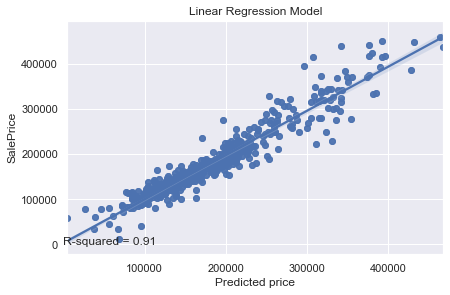

In [80]:
r_squared= 0.913
plt.scatter(train_preds, y_test, alpha=0.75, color='b')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.text(1, 0.91, 'R-squared = %0.2f' % r_squared)
sns.set_theme(color_codes=True)
sns.regplot(train_preds, y_test)

In [47]:
#Use Zip to See lr Coefficients beside our columns, replace with each instance
list(zip(X.columns,lr.coef_))

[('MS SubClass', -91.68602477329681),
 ('Lot Frontage', 84.0870989758658),
 ('Lot Area', 0.6530343499122395),
 ('Overall Qual', 6418.276110602192),
 ('Overall Cond', 4827.167720329179),
 ('Year Built', 450.6792489906442),
 ('Year Remod/Add', 58.01089942990338),
 ('Mas Vnr Area', 13.744932569395829),
 ('BsmtFin SF 1', 1.445372095807869),
 ('Bsmt Unf SF', -7.42355609680817),
 ('Total Bsmt SF', 23.790248385156247),
 ('1st Flr SF', 3.672944920491318),
 ('2nd Flr SF', 19.810705139393576),
 ('Gr Liv Area', 26.55184530272436),
 ('Bsmt Full Bath', 7440.732080290121),
 ('Full Bath', 7881.695000443667),
 ('Half Bath', 3113.0470939164125),
 ('Bedroom AbvGr', -134.88992933970124),
 ('Kitchen AbvGr', -13966.343447133288),
 ('TotRms AbvGrd', 253.28373292540093),
 ('Fireplaces', 5959.780194923042),
 ('Garage Yr Blt', -24.495498975313097),
 ('Garage Cars', 4819.745437432224),
 ('Garage Area', 12.258626344247205),
 ('Wood Deck SF', 1.0406837782495586),
 ('Open Porch SF', -9.76461459698902),
 ('Enclosed

In [48]:
from statsmodels.api import OLS, add_constant
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)
sm_model = OLS(endog = y_train, exog = X_train)

In [49]:
sm_model = sm_model.fit()

In [50]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              459.6
Date:                Thu, 22 Jul 2021   Prob (F-statistic):                        0.00
Time:                        01:02:32   Log-Likelihood:                         -17578.
No. Observations:                1538   AIC:                                  3.560e+04
Df Residuals:                    1315   BIC:                                  3.679e+04
Df Model:                         223                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MS SubClass            -95.1937     78.134     -1.218      0.223    -248.475      58.088
Lot Frontage            84.4164     47.209      1.788      0.074      -8.196     177.029
Lot Area                 0.6518      0.202      3.235      0.001       0.257       1.047
Overall Qual          6378.9353   1038.974      6.140      0.000    4340.708    8417.163
Overall Cond          4844.5422    910.629      5.320      0.000    3058.098    6630.987
Year Built            -303.6430     82.671     -3.673      0.000    -465.824    -141.461
Year Remod/Add          56.9206     57.717      0.986      0.324     -56.307     170.148
Mas Vnr Area            13.5396      6.161      2.198      0.028       1.453      25.627
BsmtFin SF 1             1.6423      7.420      0.221      0.825     -12.914      16.198
Bsmt Unf SF             -7.3406      7.528     -0.975      0.330     -22.108       7.427
Total Bsmt SF           23.7682      8.315      2.858      0.004       7.456      40.080
1st Flr SF               3.8824     14.911      0.260      0.795     -25.369      33.134
2nd Flr SF              19.8960     14.169      1.404      0.161      -7.901      47.693
Gr Liv Area             26.2960     14.741      1.784      0.075      -2.622      55.214
Bsmt Full Bath        7424.3002   1806.876      4.109      0.000    3879.626     1.1e+04
Full Bath             8125.0216   2160.297      3.761      0.000    3887.017    1.24e+04
Half Bath             3244.7379   2031.538      1.597      0.110    -740.672    7230.147
Bedroom AbvGr         -109.3003   1312.996     -0.083      0.934   -2685.096    2466.496
Kitchen AbvGr        -1.353e+04   6090.043     -2.222      0.026   -2.55e+04   -1587.171
TotRms AbvGrd          199.0423    951.989      0.209      0.834   -1668.542    2066.626
Fireplaces            5980.8416   1405.478      4.255      0.000    3223.618    8738.065
Garage Yr Blt          -29.1614     55.925     -0.521      0.602    -138.873      80.550
Garage Cars           4752.9952   2487.269      1.911      0.056    -126.454    9632.444
Garage Area             12.5206      8.403      1.490      0.136      -3.965      29.006
Wood Deck SF             1.1006      6.091      0.181      0.857     -10.849      13.050
Open Porch SF          -10.5690     11.614     -0.910      0.363     -33.352      12.214
Enclosed Porch          12.9668     12.963      1.000      0.317     -12.464      38.398
Screen Porch            65.5401     12.421      5.277      0.000      41.174      89.907
HouseAge              -553.1707     96.573     -5.728      0.000    -742.624    -363.717
MS Zoning_C (all)     4.598e+04   4.09e+04      1.125      0.261   -3.42e+04    1.26e+05
MS Zoning_FV          5.772e+04   3.98e+04     

In [54]:
# Automated feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select = SelectFromModel(RandomForestRegressor(n_estimators = 250, random_state = 365))
select.fit(X_train, y_train)

X_train_afs = select.transform(X_train)
X_test_afs = select.transform(X_test)


In [56]:
lr_afs_scores = cross_val_score(lr, X_train_afs, y_train, cv=3)
print(lr_afs_scores)
lr_afs_scores.mean()

[0.8116468  0.83200429 0.57880308]


0.7408180547302164

In [57]:
lasso_afs_scores = cross_val_score(lasso, X_train_afs, y_train, cv=3)
print(lasso_afs_scores)
lasso_afs_scores.mean()

[0.77976204 0.76801406 0.47204453]


0.6732735450021899

In [58]:
ridge_afs_scores = cross_val_score(ridge, X_train_afs, y_train, cv=3)
print(ridge_afs_scores)
ridge_afs_scores.mean()

[0.81255745 0.83256907 0.57917797]


0.7414348298356552

In [59]:
# model fiting
lr.fit(X_train_afs, y_train)

LinearRegression()

In [60]:
lr.score(X_train_afs, y_train), lr.score(X_test_afs, y_test)

(0.7959127147150926, 0.8564904470934613)

In [61]:
# r2 score
train_afs_preds = lr.predict(X_test_afs)
train_afs_preds.shape
r2_score(y_test, train_afs_preds)
# Auto feature selection score lower than manual

0.8564904470934613

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Linear Regression Model'}, xlabel='Predicted price', ylabel='SalePrice'>

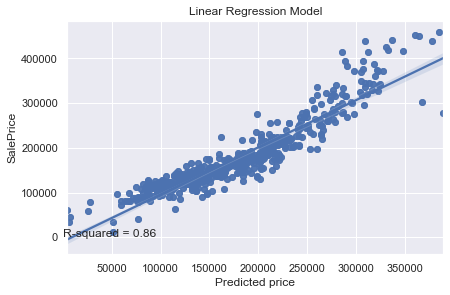

In [81]:
r_squared= 0.856
plt.scatter(train_afs_preds, y_test, alpha=0.75, color='b')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.text(0.9, 0.8, 'R-squared = %0.2f' % r_squared)
sns.set_theme(color_codes=True)
sns.regplot(train_afs_preds, y_test)

Lasso Regression

In [85]:
from sklearn.linear_model import Lasso, LassoCV

lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
lasso.fit(X_train, y_train)
print(lasso.alpha_)

146301.8933281937


In [86]:
lasso = Lasso(alpha=lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
lasso.fit(X_train, y_train)
print(lasso_scores)
print(np.mean(lasso_scores))

[0.85370094 0.77195799 0.76744008 0.78733829 0.75883653 0.79648368
 0.81708828 0.59112869 0.15033711 0.75685355]
0.7051165134654664


In [106]:
from sklearn.metrics import r2_score
lasso_preds = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_preds)
print(lasso_r2)

0.8107026457870621


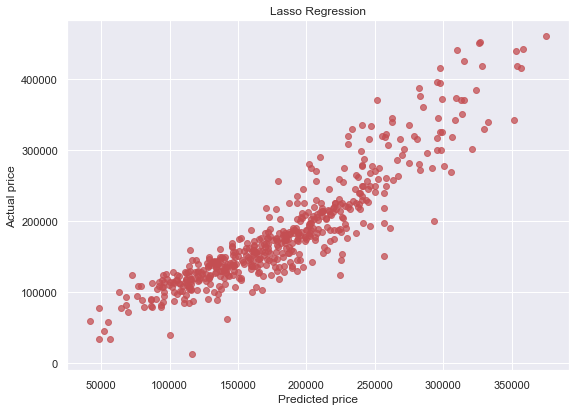

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(lasso_preds, y_test, alpha= 0.75, color = 'r')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Lasso Regression')
plt.show()

Ridge Regression

In [93]:
ridge_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=ridge_alphas, cv=10)
ridge.fit(X_train, y_train)

print(ridge.alpha_)

5.052631065335681


In [95]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
ridge.fit(X_train, y_train)
print(ridge_scores)
print(np.mean(ridge_scores))

[0.92525208 0.88982141 0.84032393 0.90651261 0.84642973 0.91410466
 0.92884993 0.79071436 0.5773788  0.88615096]
0.8505538477181707


In [107]:
ridge_preds = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_preds)
print(ridge_r2)

0.9123284367495199


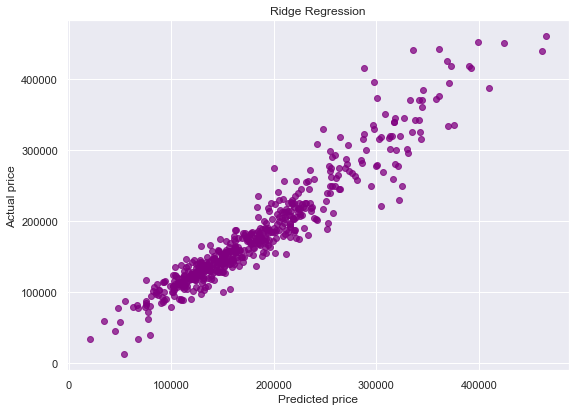

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(ridge_preds, y_test, alpha= 0.75, color = 'purple')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Ridge Regression')
plt.show()

ElasticNet Regression

In [99]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
l1_ratios = np.linspace(0.01, 1.0, 25)
Enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
Enet.fit(X_train, y_train)

print(Enet.alpha_)
print(Enet.l1_ratio_)

146301.8933281937
1.0


In [100]:
Enet_model = ElasticNet(alpha=Enet.alpha_, l1_ratio=Enet.l1_ratio_)
Enet_model_scores = cross_val_score(Enet_model, X_train, y_train, cv=10)
Enet_model.fit(X_train, y_train)

print(Enet_model_scores)
print(np.mean(Enet_model_scores))

[0.85370094 0.77195799 0.76744008 0.78733829 0.75883653 0.79648368
 0.81708828 0.59112869 0.15033711 0.75685355]
0.7051165134654664


In [108]:
#prediction
Enet_preds = Enet_model.predict(X_test)
E_r2 = r2_score(y_test, Enet_preds)
print(E_r2)

0.8107026457870621


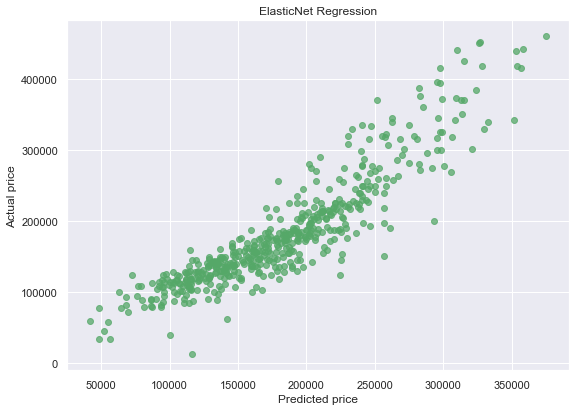

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(Enet_preds, y_test, alpha= 0.75, color = 'g')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('ElasticNet Regression')
plt.show()

In [113]:
lr_r2, lasso_r2, ridge_r2, E_r2

(0.9134796816246964,
 0.8107026457870621,
 0.9123284367495199,
 0.8107026457870621)